Best paramteres: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Accuracy:  1.0


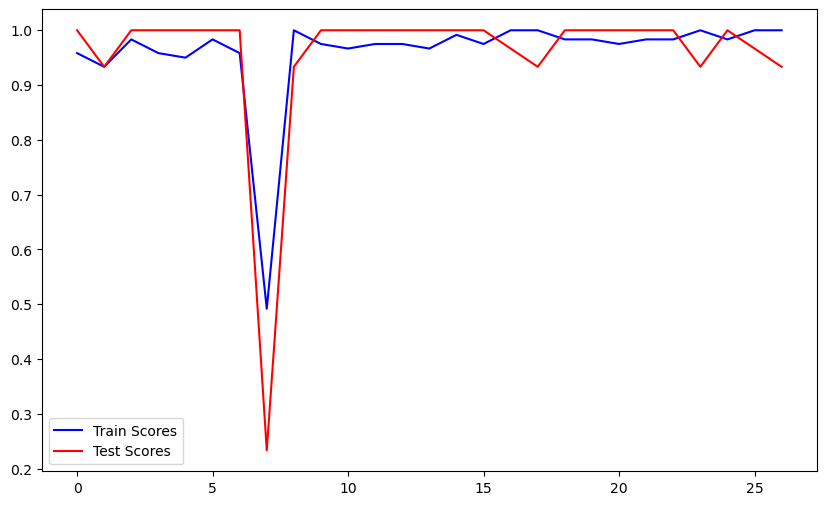

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

C_range = [0.1,1,10]
gamma_range = [0.1,1,10]
kernel_range = ['linear','rbf','poly']

train_scores =[]
test_scores=[]

best_accuracy=0
best_params ={}

for C in C_range:
    for gamma in gamma_range:
        for kernel in kernel_range:
            svm = SVC(C=C, gamma=gamma,kernel=kernel)
            svm.fit(X_train, y_train)
            train_pred = svm.predict(X_train)
            test_pred = svm.predict(X_test)
            train_score = accuracy_score(y_train, train_pred)
            test_score = accuracy_score(y_test, test_pred)
            
            train_scores.append(train_score)
            test_scores.append(test_score)
            accuracy = np.mean(y_pred==y_test)
            if accuracy> best_accuracy:
                best_accuracy = accuracy
                best_params = {'C':C, 'gamma':gamma, 'kernel':kernel}
                
print("Best paramteres:", best_params)
print("Best Accuracy: ", best_accuracy)

#plot the scores
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(range(len(train_scores)), train_scores, c='b', label='Train Scores')
ax.plot(range(len(test_scores)), test_scores, c='r',label='Test Scores')
ax.legend(loc='best')
plt.show()

In [18]:
#estimate the uncertainities
svm = SVC(C=1, gamma=0.1, kernel='linear', probability=True)
svm.fit(X_train, y_train)

#use predict_proba for uncertainities
probabilities = svm.predict_proba(X_train)
print(probabilities)

[[9.52994824e-03 6.83529376e-02 9.22117114e-01]
 [1.42393750e-02 7.78749590e-01 2.07011035e-01]
 [9.63744853e-01 2.40380910e-02 1.22170560e-02]
 [1.61038988e-02 3.44738154e-01 6.39157947e-01]
 [5.80151972e-03 5.32409389e-03 9.88874386e-01]
 [1.99805757e-02 9.48568998e-01 3.14504261e-02]
 [9.54626231e-01 3.06993055e-02 1.46744633e-02]
 [1.41144543e-02 1.96920150e-01 7.88965396e-01]
 [1.23891331e-02 9.53472828e-01 3.41380389e-02]
 [1.53823211e-02 9.72121925e-01 1.24957537e-02]
 [8.29676081e-03 3.11419352e-02 9.60561304e-01]
 [9.68385285e-01 2.07817762e-02 1.08329392e-02]
 [1.30004234e-02 1.01503354e-01 8.85496223e-01]
 [9.39998551e-01 4.15081973e-02 1.84932514e-02]
 [9.69414358e-01 1.96157361e-02 1.09699060e-02]
 [3.14452408e-02 9.57187058e-01 1.13677014e-02]
 [9.23792043e-03 6.56578803e-02 9.25104199e-01]
 [5.24441018e-03 4.06570197e-03 9.90689888e-01]
 [1.43434465e-02 1.80966015e-01 8.04690538e-01]
 [4.99437804e-03 9.87082916e-03 9.85134793e-01]
 [1.90303930e-02 9.70662317e-01 1.030728

In [19]:
uncertainties = 1 - probabilities.max(axis=1)

sorted_indices = uncertainties.argsort()

outliers = sorted_indices[:10]

print("Indices of outliers:", outliers)


Indices of outliers: [ 84  91  74 118  50  21  73  55  17   4]
